In [1]:
import requests

In [ ]:
API_TOKEN = "your_api_key"
headers = {
    "Authorization": f"Bearer {API_TOKEN}"
}

In [3]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"

In [4]:
def generate_image(prompt):
    payload = {"inputs": prompt}
    response = requests.post(
        f"https://api-inference.huggingface.co/models/{model_id}",
        headers=headers,
        json=payload,   
    )

    if response.status_code == 200:
        with open("generated_image.png", "wb") as f:
            f.write(response.content)
        print("✅ Image saved as 'generated_image.png'")
    else:
        print("❌ Error:", response.status_code, response.text)
        try:
            print(response.json())  
        except:
            print(response.text)

In [6]:
prompt_text =input("Enter the description: ")

generate_image(prompt_text)

✅ Image saved as 'generated_image.png'


Generated image:



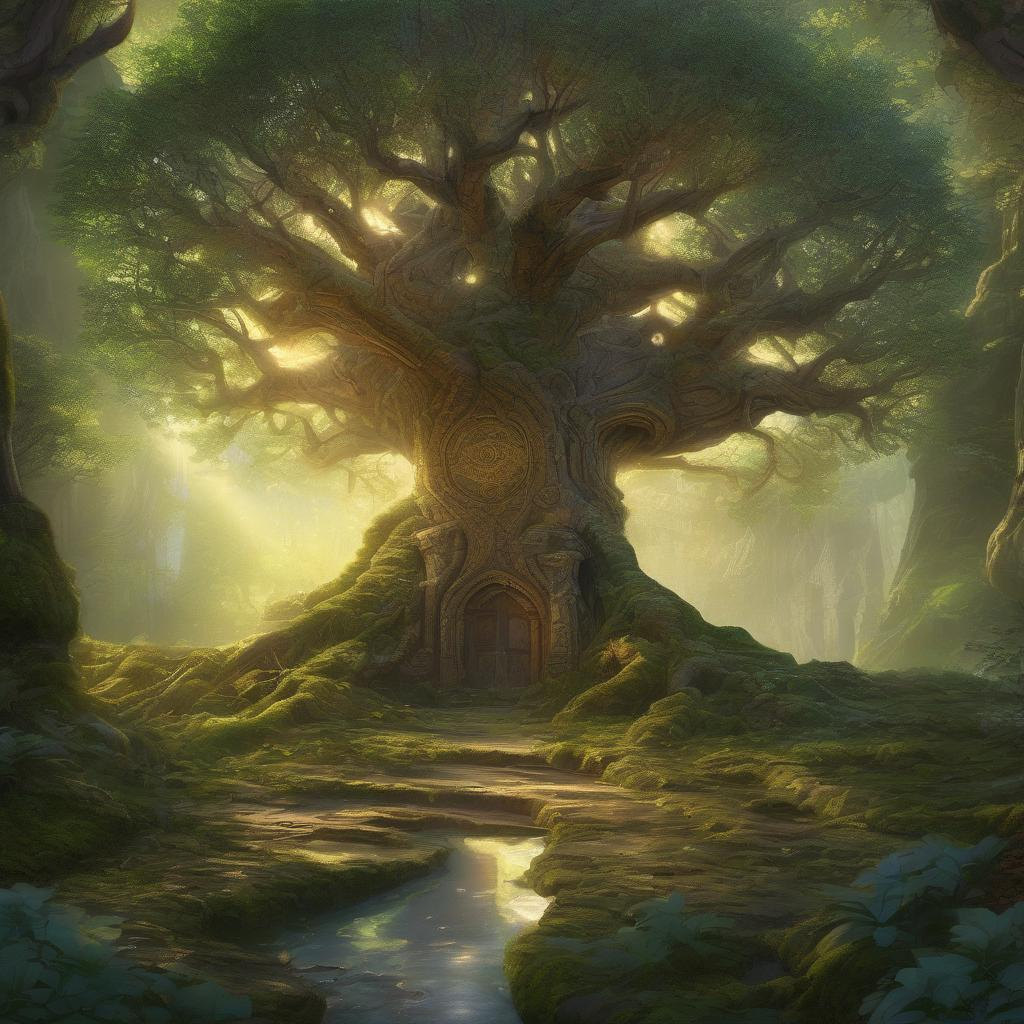


🎯 Prompt Used:
A majestic, ancient tree of life stands at the center of a forgotten, moss-covered ruin. The tree itself is colossal, its bark gnarled and glowing faintly with intricate luminescent runes that pulse with a soft, warm, golden light. Its branches reach skyward, intertwining with delicate, crystalline leaves that shimmer with iridescent hues of emerald, sapphire, and amethyst. At the base of the tree, nestled amongst overgrown, crumbling stone pillars, a lone, robed figure is seated cross-legged. They are slender, with long, flowing silver hair, and their face is serene, eyes closed in deep meditation. Their hands are gently clasped, and from their fingertips, tendrils of soft, ethereal white-blue energy are gently weaving into the glowing roots of the tree, signifying a transfer or communion of power. The setting is a dense, ancient forest, shrouded in a misty, ethereal atmosphere. Giant, fern-like plants and bioluminescent fungi dot the forest floor, casting subtle, ambi

In [7]:
from PIL import Image
from IPython.display import display
import os
import json


def display_image_and_properties(image_path):
    try:
        with Image.open(image_path) as img:
            display(img)

        metadata = {
                "prompt_used": prompt_text,
                "image_properties": {
                    "filename": os.path.basename(image_path),
                    "format": img.format,
                    "width": img.size[0],
                    "height": img.size[1],
                    "mode": img.mode
                }
            }

        # Print properties
        print("\n🎯 Prompt Used:")
        print(prompt_text)
        print("\n🖼️ Image Properties:")
        for key, value in metadata["image_properties"].items():
            print(f"• {key.capitalize()}: {value}")

        # Save properties to a JSON file
        json_path = image_path.replace(".png", "_properties.json")
        with open(json_path, "w") as json_file:               
            json.dump(metadata, json_file, indent=4)

        print(f"\n✅ Properties saved to: {json_path}")

    except Exception as e:
        print("❌ Error processing image:", e)

print("Generated image:\n")
image_path = "generated_image.png"
display_image_and_properties(image_path)

In [8]:
import json
import os
from datetime import datetime

def log_image(prompt, image_path, model_id):
    history_file = "history.json"

    if os.path.exists(history_file):
        try:
            with open(history_file, "r") as f:
                history = json.load(f)
            if not isinstance(history, dict):
                history = {}
        except json.JSONDecodeError:
            history = {}
    else:
        history = {}

    image_entry = {
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "prompt": prompt,
        "model_id": model_id,
        "image_path": image_path,
        # "image_properties": image_properties
    }

    history.setdefault("images", []).append(image_entry)

    with open(history_file, "w") as f:
        json.dump(history, f, indent=4)

    print(f"🖼️ Image history saved to '{history_file}'")

log_image(prompt_text, image_path , model_id="stabilityai/stable-diffusion-xl-base-1.0")



🖼️ Image history saved to 'history.json'
